In [16]:
import pysm3
import pysm3.units as u
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sky = pysm3.Sky(nside=1024, preset_strings=["d0"])

In [3]:
map_150GHz = sky.get_emission(150 * u.GHz)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [4]:
map_150GHz = map_150GHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(150*u.GHz))

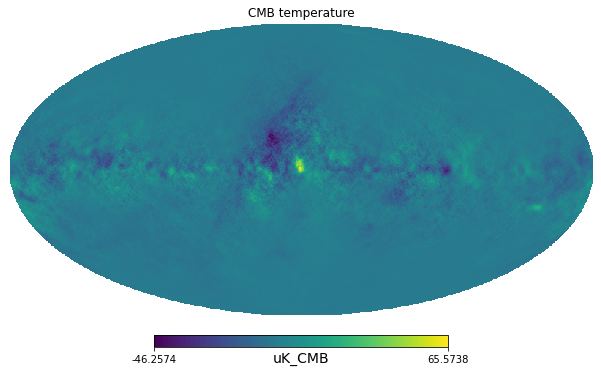

In [5]:
hp.mollview(map_150GHz[2], title="CMB temperature", unit="uK_CMB")


In [6]:
mask = hp.read_map('/project/projectdirs/litebird/simulations/maps/lensing_project_paper/Masks/S4_Nside2048_fsky_0p5_binary.fits')

In [7]:
mask = hp.ud_grade(mask, nside_out=1024)

In [8]:
dust = map_150GHz * mask

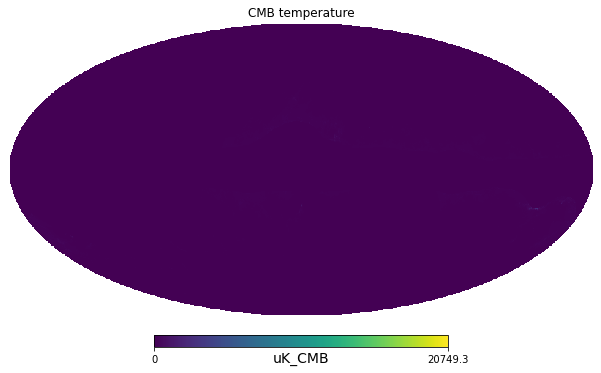

In [12]:
hp.mollview(dust[0], title="CMB temperature", unit="uK_CMB")

In [13]:
maps_TEB = hp.map2alm(map_150GHz)

In [14]:
dust_TEB = hp.map2alm(dust)

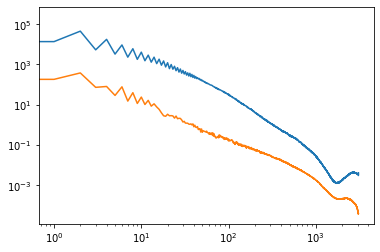

In [19]:
plt.loglog(hp.alm2cl(maps_TEB[0]))
plt.loglog(hp.alm2cl(dust_TEB[0]))